Импорт библиотек

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Зададим случайную величину, имеющую экспоненциальное распределение и выведем ее характеристики - мат. ожидание и дисперсию. Параметр масштаба scale = 1/(lambda)


In [18]:
exponential_rv = sts.expon(scale = 1.5)
m_exp, v_exp = exponential_rv.stats()
print('mean = %s, variance = %s' % (m_exp, v_exp))

mean = 1.5, variance = 2.25


Подготовим данные для построения графиков: выборку случайной величины размера 1000 и значения фукции плотности вероятности на отрезке [0,8]

In [19]:
r_val = exponential_rv.rvs(size=1000)
x = np.linspace(0,8,200)
pdf = exponential_rv.pdf(x)

Внимание! Параметр normed=True в последней версии библиотеки matplotlib.pyplot устарел и вместо него используется параметр density=True

Построим графики плотности вероятности и гистограмму распределения выборки случайной величины

Text(0.5, 0, '$x$')

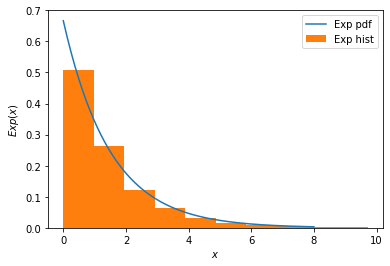

In [20]:
plt.plot(x, pdf, label = 'Exp pdf')
plt.hist(r_val, density = True, label = 'Exp hist')
plt.legend()
plt.ylabel('$Exp(x)$')
plt.xlabel('$x$')

Сформируем массивы размера 1000 выборочных средних для выборок размера 5, 10, 50


In [21]:
sm_5 = [np.mean(exponential_rv.rvs(size=5)) for i in np.arange(1, 1000)]
sm_10 = [np.mean(exponential_rv.rvs(size=10)) for i in np.arange(1, 1000)]
sm_50 = [np.mean(exponential_rv.rvs(size=50)) for i in np.arange(1, 1000)]

Определим параметры нормальных распределений по теоретическим значениям мат. ожидания и дисперсии исходной случайной величины.
Данные нормальные рапределения будут аппроксимировать распределение выборочных средних для выборок размера 5, 10, 50.
Выведем значения параметров нормальных распределений

In [22]:
mu = m_exp
sigma = np.sqrt(v_exp/5)
norm_rv_5 = sts.norm(loc=mu, scale=sigma)
print('Normal distribution parameters for sample size = 5:\n mu = %s, sigma = %s' % (mu, sigma))

Normal distribution parameters for sample size = 5:
 mu = 1.5, sigma = 0.6708203932499369


In [23]:
mu = m_exp
sigma = np.sqrt(v_exp/10)
norm_rv_10 = sts.norm(loc=mu, scale=sigma)
print('Normal distribution parameters for sample size = 10:\n mu = %s, sigma = %s' % (mu, sigma))

Normal distribution parameters for sample size = 10:
 mu = 1.5, sigma = 0.4743416490252569


In [24]:
mu = m_exp
sigma = np.sqrt(v_exp/50)
norm_rv_50 = sts.norm(loc=mu, scale=sigma)
print('Normal distribution parameters for sample size = 50:\n mu = %s, sigma = %s' % (mu, sigma))

Normal distribution parameters for sample size = 50:
 mu = 1.5, sigma = 0.21213203435596426


Подготовим данные для построения графиков: значения фукций плотностей вероятности нормальных распределений на отрезке [0,4]

In [25]:
x = np.linspace(0,4,100)
pdf_5 = norm_rv_5.pdf(x)
pdf_10 = norm_rv_10.pdf(x)
pdf_50 = norm_rv_50.pdf(x)

Построим графики плотностей вероятности и гистограмму распределения выборочных средних для выборок размера 5, 10, 50

Text(0.5, 0, '$mean$')

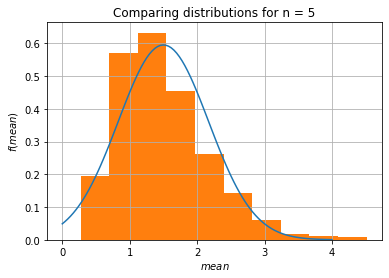

In [26]:
plt.plot(x, pdf_5, label = 'normal distribution')
plt.hist(sm_5, density = True, label = 'sample mean distribution')
plt.title('Comparing distributions for n = 5')
plt.grid(True)
plt.ylabel('$f(mean)$')
plt.xlabel('$mean$')

Text(0.5, 0, '$mean$')

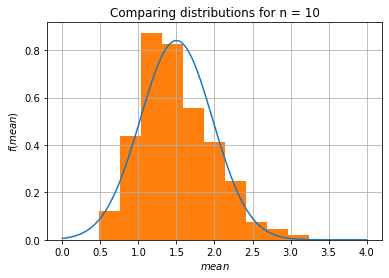

In [27]:
plt.plot(x, pdf_10, label = 'normal distribution')
plt.hist(sm_10, density = True, label = 'sample mean distribution')
plt.title('Comparing distributions for n = 10')
plt.grid(True)
plt.ylabel('$f(mean)$')
plt.xlabel('$mean$')

Text(0.5, 0, '$mean$')

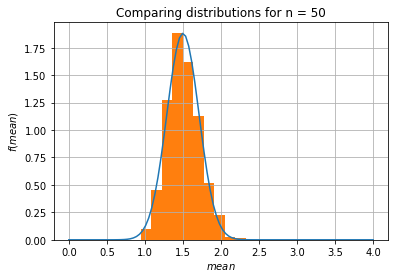

In [28]:
plt.plot(x, pdf_50, label = 'normal distribution')
plt.hist(sm_50, density = True, label = 'sample mean distribution')
plt.title('Comparing distributions for n = 50')
plt.grid(True)
plt.ylabel('$f(mean)$')
plt.xlabel('$mean$')

Выводы:

С ростом объема выборки для подсчета выборочных средних точность приближения рапределения выборочных средних к нормальному распределению увеличивается
Также распределение выборочных средних становится более гладким и сужается